# <u>Análisis Inicial de Series de Tiempo</u>


## Series de tiempo estacionarias

Un tipo muy importante de series de tiempo son las series de tiempo estacionarias. Una series de tiempo se dice que es estrictamente estacionaria si sus propiedades no son afectadas por los cambios a lo largo del tiempo. Es decir, que se deberían cumplir tres criterios básicos para poder considerar a una series de tiempo como estacionaria:

1. **La media de la serie no debe ser una función de tiempo; sino que debe ser constante**. La siguiente imagen muestra una serie que cumple con esta condición y otra que no la cumple.
<img alt="Series de tiempo con Python" title="media estacionaria - no estacionaria" src="https://relopezbriega.github.io/images/Mean_stationary.png" high=300px width=500px>
2. **La varianza de la serie no debe ser una función del tiempo**. El siguiente gráfico representa una serie cuya varianza no esta afectada por el tiempo (es estacionaria) y otra que no cumple con esa condición.
<img alt="Series de tiempo con Python" title="media estacionaria - no estacionaria" src="https://relopezbriega.github.io/images/Var_stationary.png" high=300px width=500px>
3. **La covarianza de la serie no debe ser una función del tiempo**. En el gráfico de la derecha, se puede observar que la propagación de la serie se va encogiendo a medida que aumenta el tiempo. Por lo tanto, la covarianza no es constante en el tiempo para la serie roja.
<img alt="Series de tiempo con Python" title="media estacionaria - no estacionaria" src="https://relopezbriega.github.io/images/Cov_stationary.png" high=300px width=500px>

### ¿Por qué son importantes las series de tiempo estacionarias?

La razón por la que estas series son importantes es que la mayoría de los modelos de series de tiempo funcionan bajo el supuesto de que la serie es estacionaria. Intuitivamente, podemos suponer que si una serie tiene un comportamiento particular en el tiempo, hay una probabilidad muy alta de que se comportamiento continúe en el futuro. Además, las teorías relacionadas con las series estacionarias son más maduras y más fáciles de implementar en comparación con series no estacionarias. A pesar de que el supuesto de que la serie es estacionaria se utiliza en muchos modelos, casi ninguna de las series de tiempo que encontramos en la práctica son estacionarias. Por tal motivo la estadística tuvo que desarrollar varias técnicas para hacer estacionaria, o lo más cercano posible a estacionaria, a una serie.

Veamos algunos ejemplos de como podemos manipular y analizar series de tiempo con la ayuda de Python.

### Importando librería para predicción con series de tiempo

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


import itertools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

### Importando Data
- Dataset: Pasajeros de aerolínea
- Unidad: Miles

In [ ]:
#Importamos la data
df = pd.read_csv('international-airline-passengers.csv')

In [ ]:
df

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.columns = ['year','passengers']

In [ ]:
df.head()

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
print('Time period start: {}\nTime period end: {}'.format(df.year.min(),df.year.max()))

Time period start: 1949-01
Time period end: 1960-12


In [ ]:
df.shape

(144, 2)

## 1.Preprocesamiento de data y visualización

__Convertimos el formato de fecha:__

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y-%m')

__Establecer índice como la columna de fecha y hora para manipulaciones más fáciles:__

---



In [ ]:
y = df.set_index('year')

In [ ]:
y.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='year', length=144, freq=None)

In [ ]:
y.isnull().sum()

passengers    0
dtype: int64

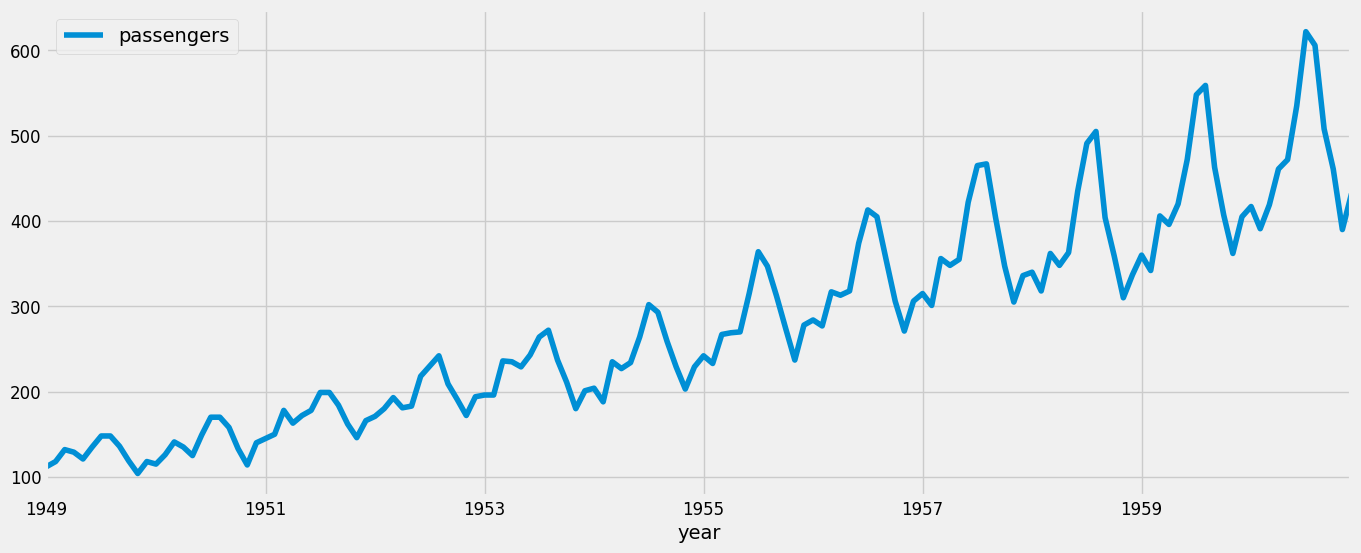

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

__La revisión de los gráficos de la densidad de observaciones puede proporcionar una mayor comprensión de la estructura de los datos:__
- La distribución no es perfectamente gaussiana (distribución normal).
- La distribución se deja desplazada.
- Las transformaciones pueden ser útiles antes del modelado.

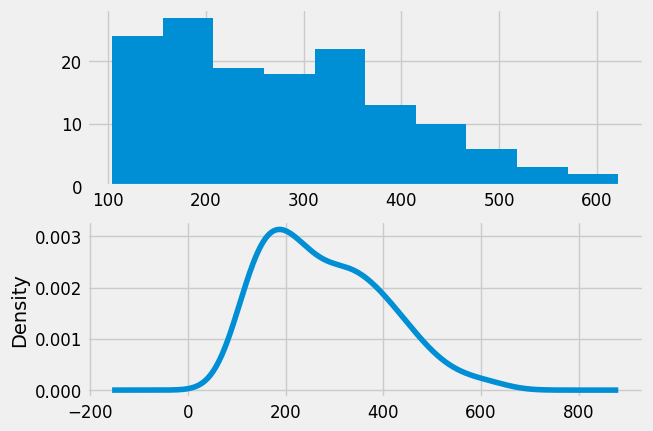

In [ ]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
y.passengers.hist()
pyplot.subplot(212)
y.passengers.plot(kind='kde')
pyplot.show()

__Cajas y bigotes:__
- Los valores medianos a través de los años confirman una tendencia al alza
- Aumento constante de la propagación, o 50% medio de los datos (cuadros) con el tiempo
- Un modelo que considere la estacionalidad podría funcionar bien

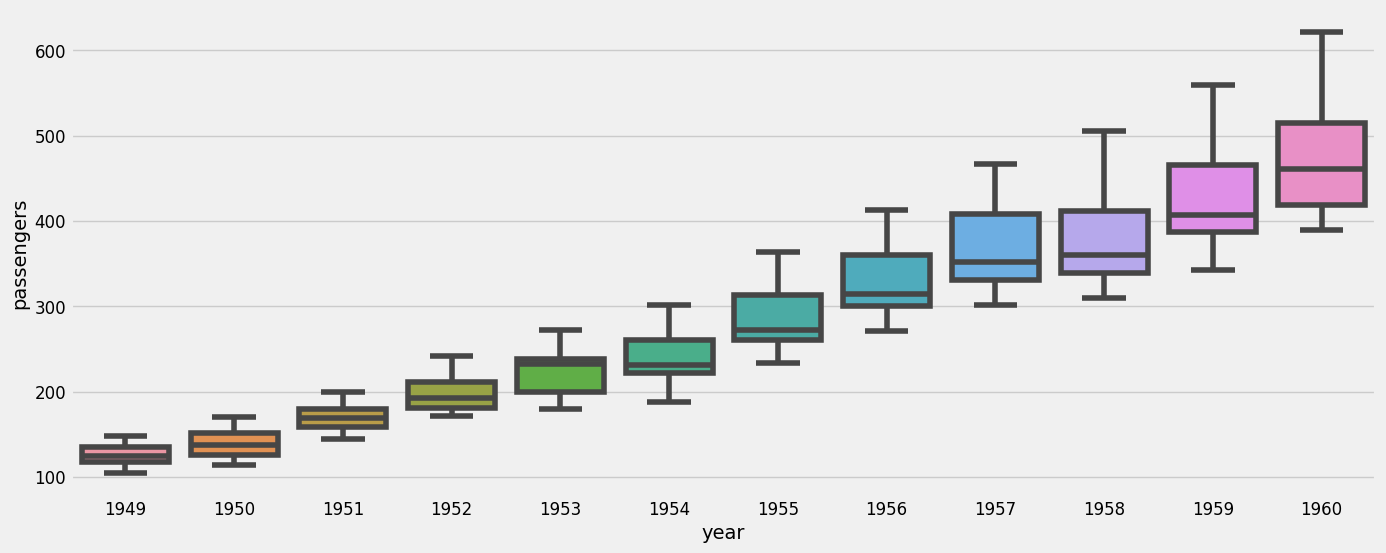

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=y.passengers.index.year, y=y.passengers, ax=ax)
pyplot.show()

__Descomponer usando el modelo de estadísticas:__
- Podemos usar statsmodels para realizar una descomposición de esta serie de tiempo.
- La descomposición de series temporales es una tarea estadística que deconstruye una serie temporal en varios componentes, cada uno de los cuales representa una de las categorías subyacentes de patrones.
- Con los modelos de estadísticas podremos ver los componentes de tendencia, estacionales y residuales de nuestros datos.

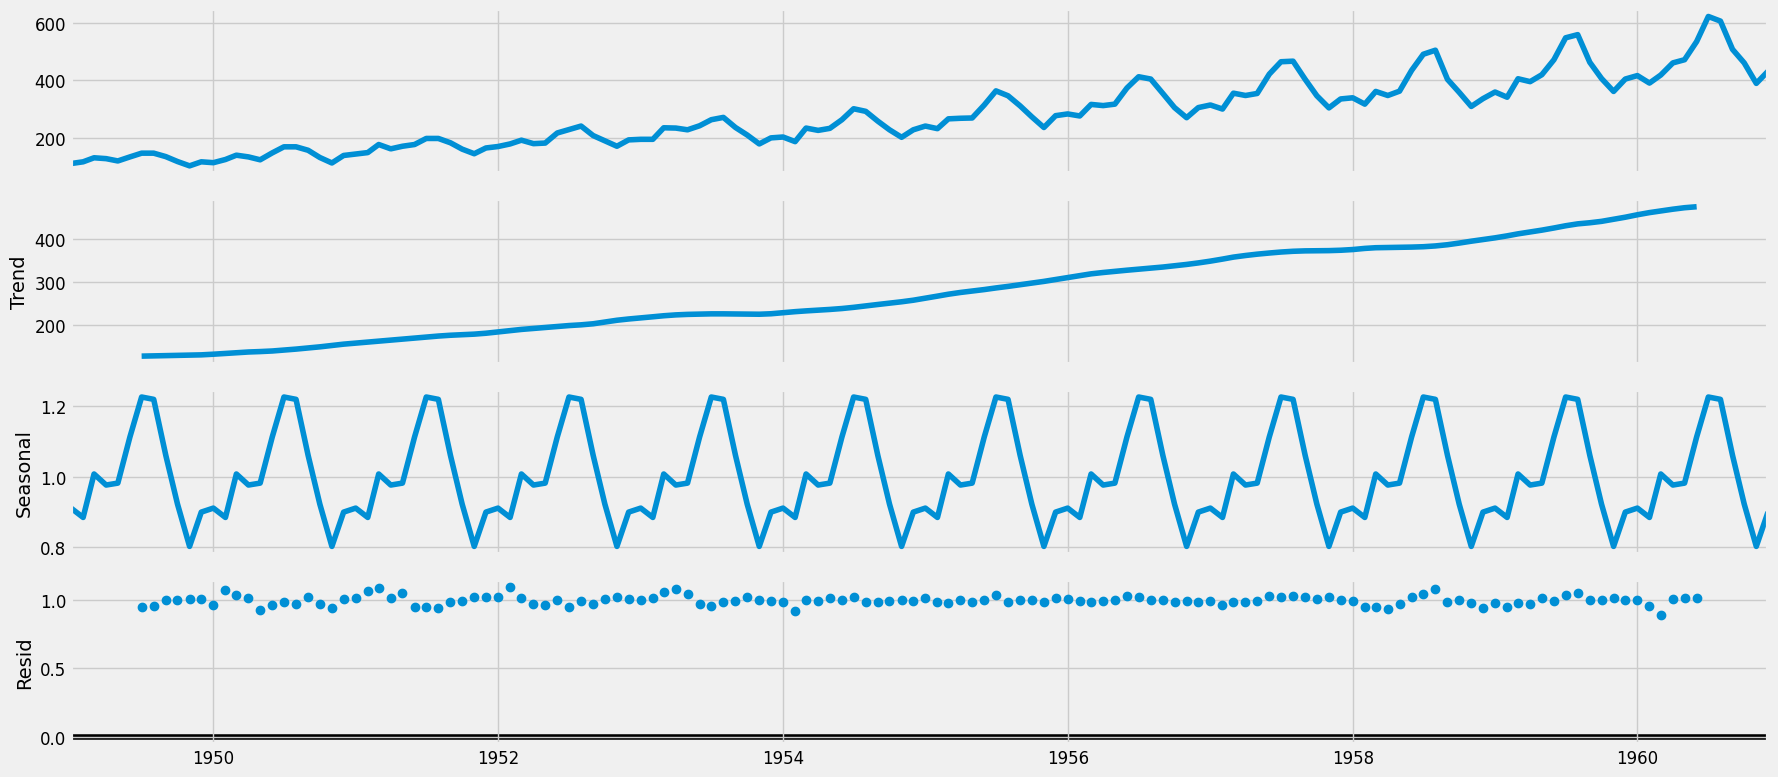

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative') # multiplicative
matplotlib.rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

<Axes: xlabel='year'>

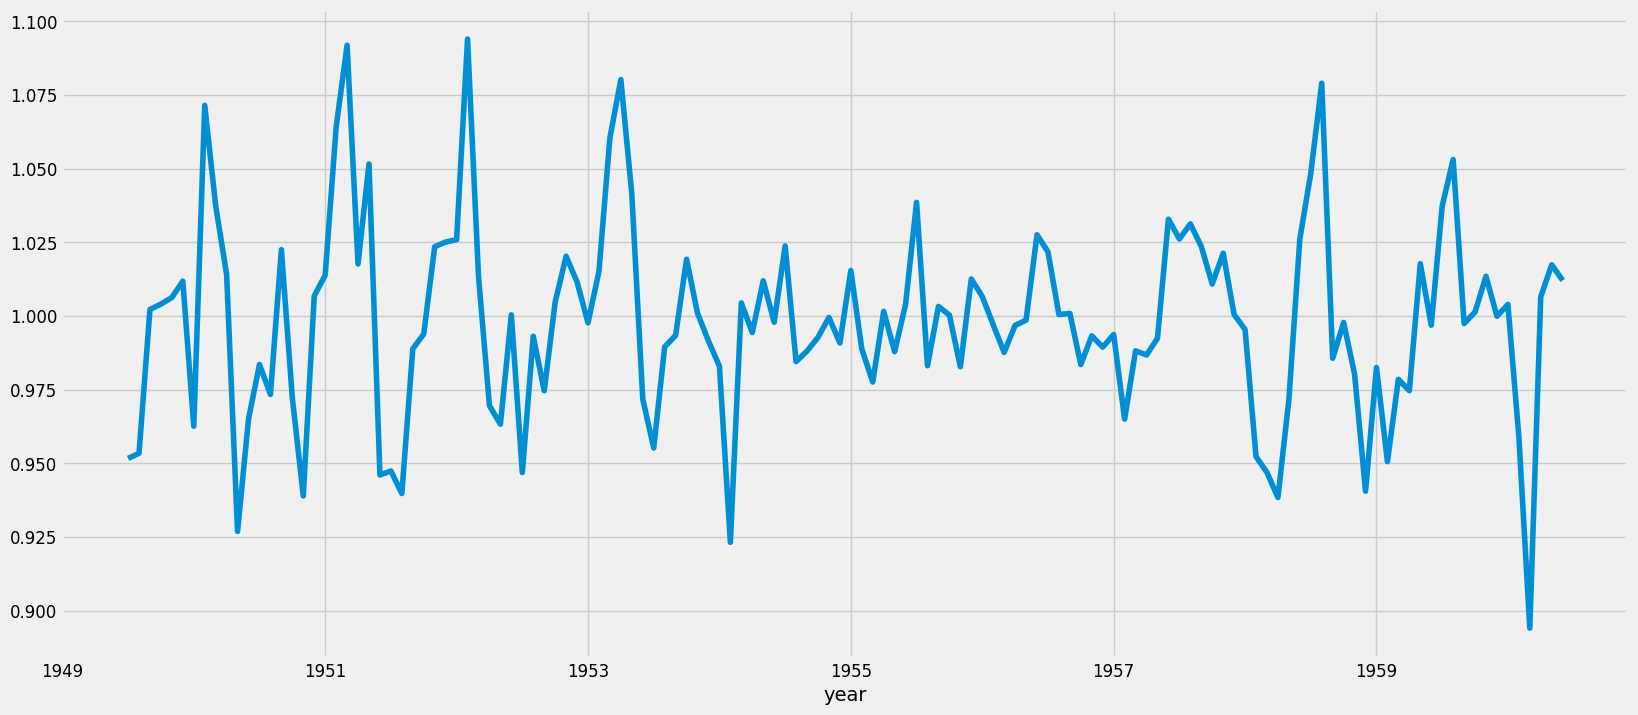

In [ ]:
#residuales
decomposition.resid.plot()

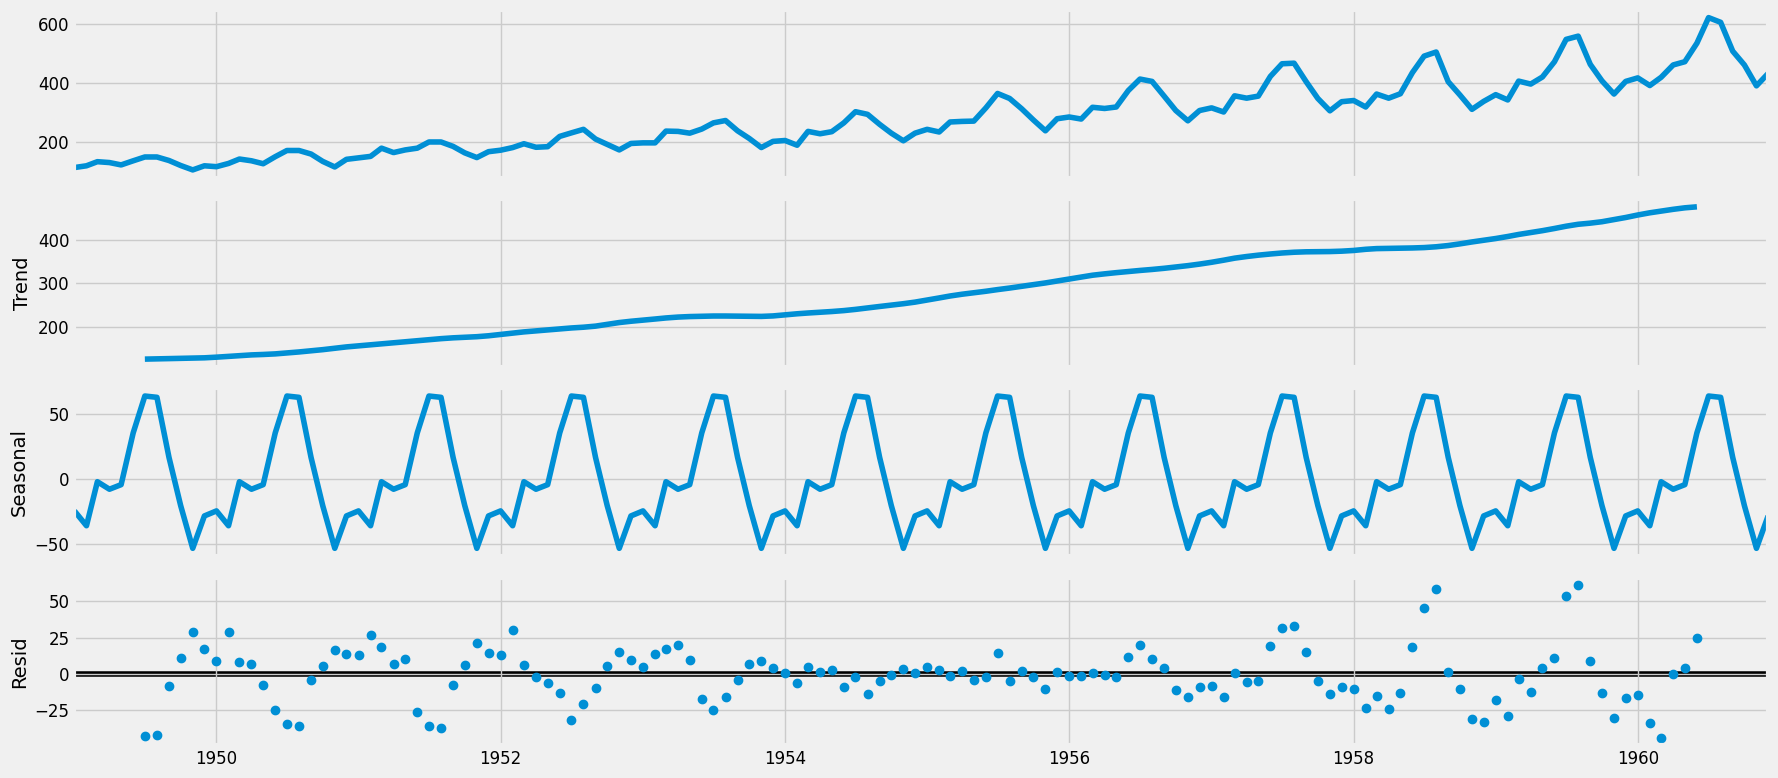

In [ ]:
from pylab import rcParams
matplotlib.rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='aditive')
fig = decomposition.plot()
plt.show()

In [ ]:
dir(decomposition)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

<Axes: xlabel='year'>

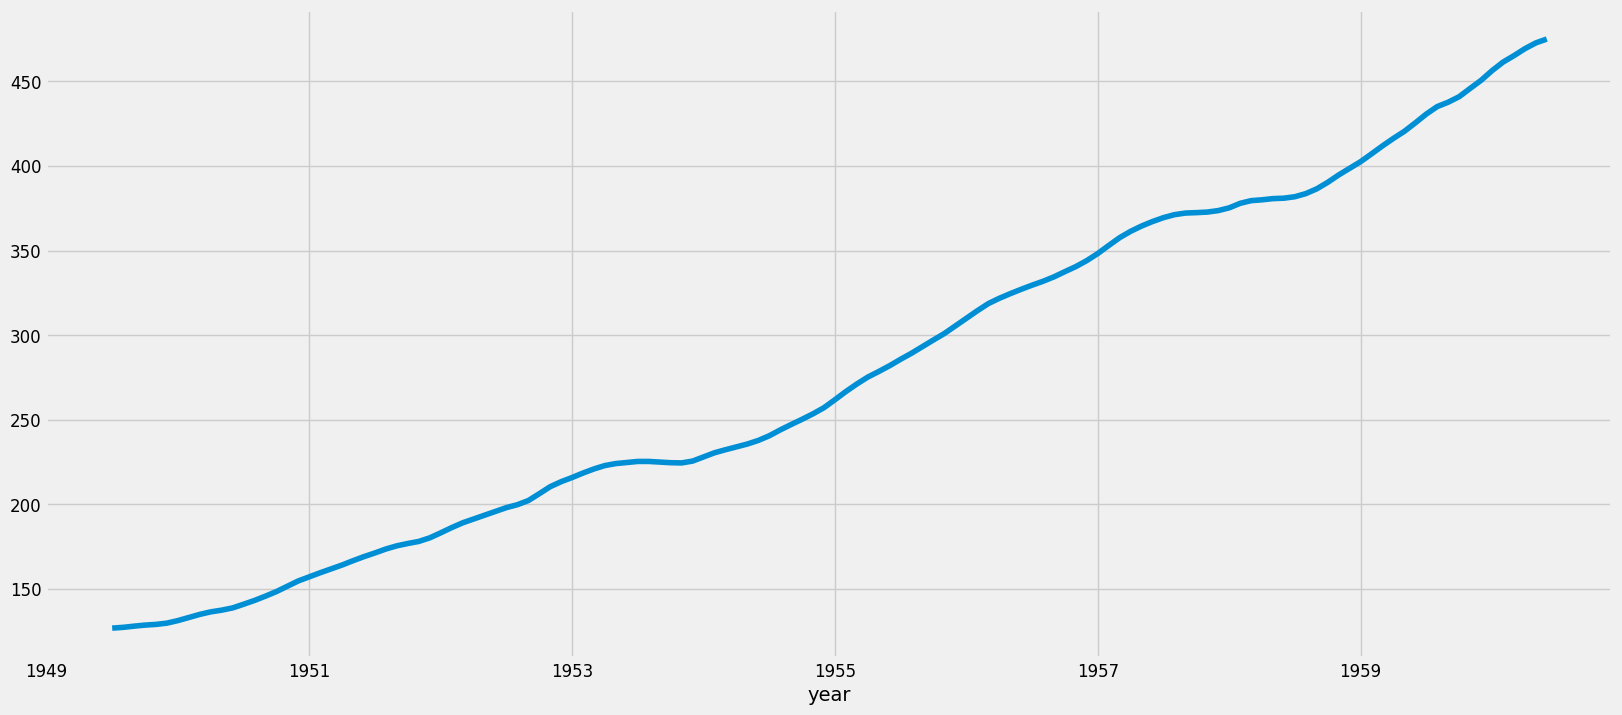

In [ ]:
#tendencia
decomposition.trend.plot()

<Axes: xlabel='year'>

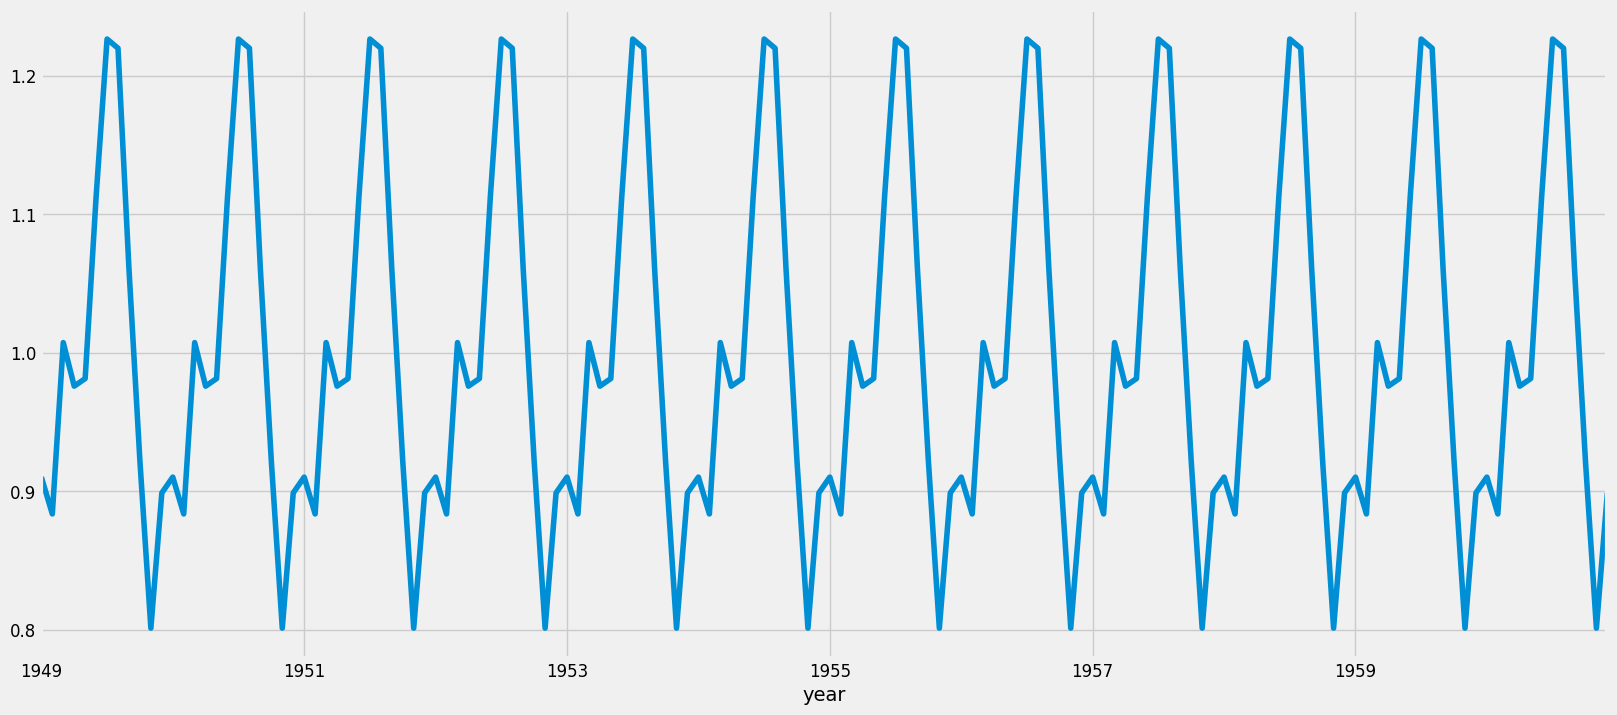

In [ ]:
#estacionalidad
decomposition.seasonal.plot()

<Axes: xlabel='year'>

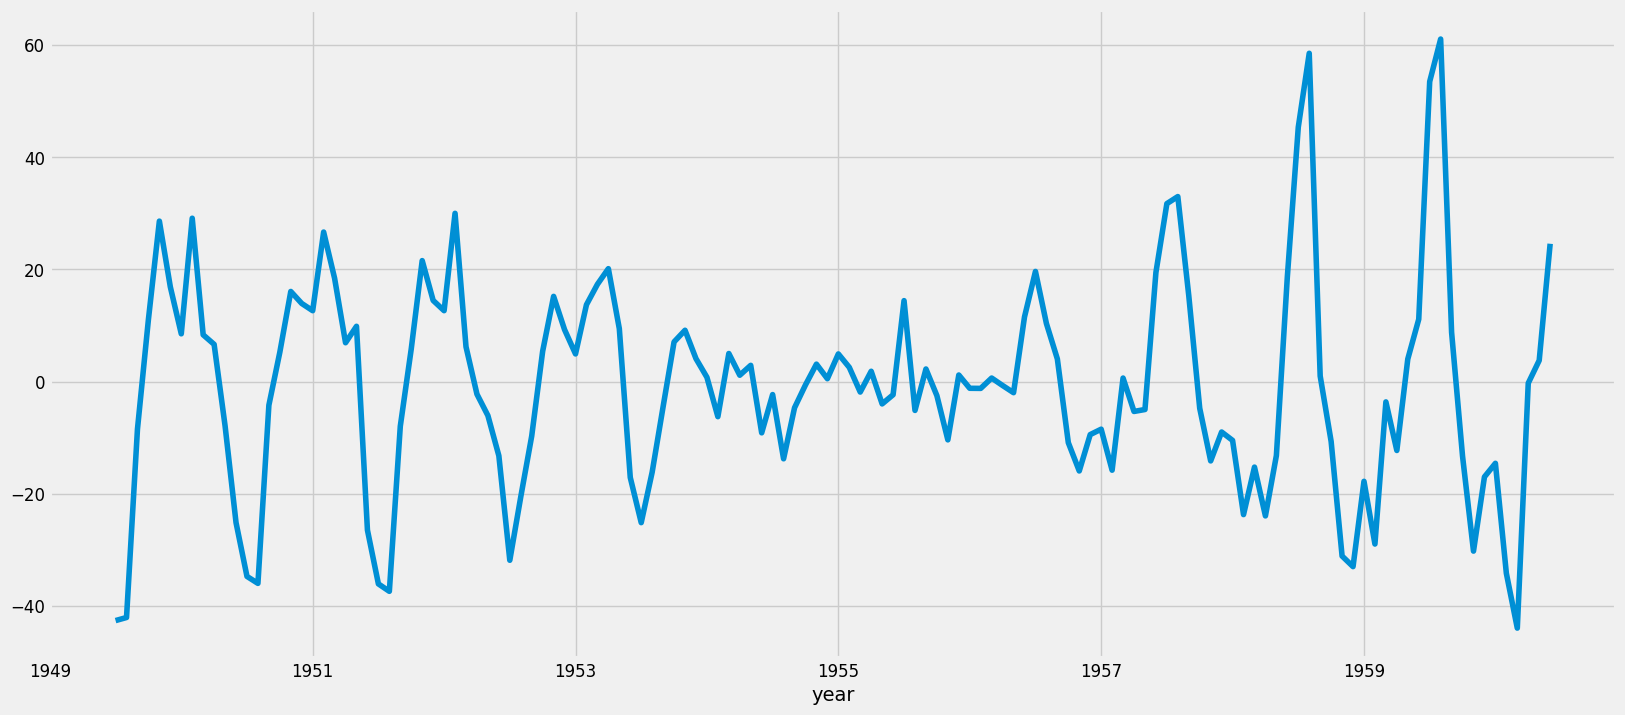

In [ ]:
#residuales
decomposition.resid.plot()

## 2.Estacionariedad
- Se dice que una serie temporal es estacionaria si sus propiedades estadísticas, como la media, la varianza permanecen constantes en el tiempo.
- La mayoría de los modelos de series temporales funcionan bajo el supuesto de que el TS es estacionario. La razón principal de esto es que hay muchas formas en que una serie puede ser no estacionaria, pero solo una forma de estacionariedad.
- Intuitivamente, podemos decir que si una serie temporal tiene un comportamiento particular a lo largo del tiempo, hay una probabilidad muy alta de que siga igual en el futuro.
- Además, las teorías relacionadas con las series estacionarias son más maduras y más fáciles de implementar en comparación con las series no estacionarias.

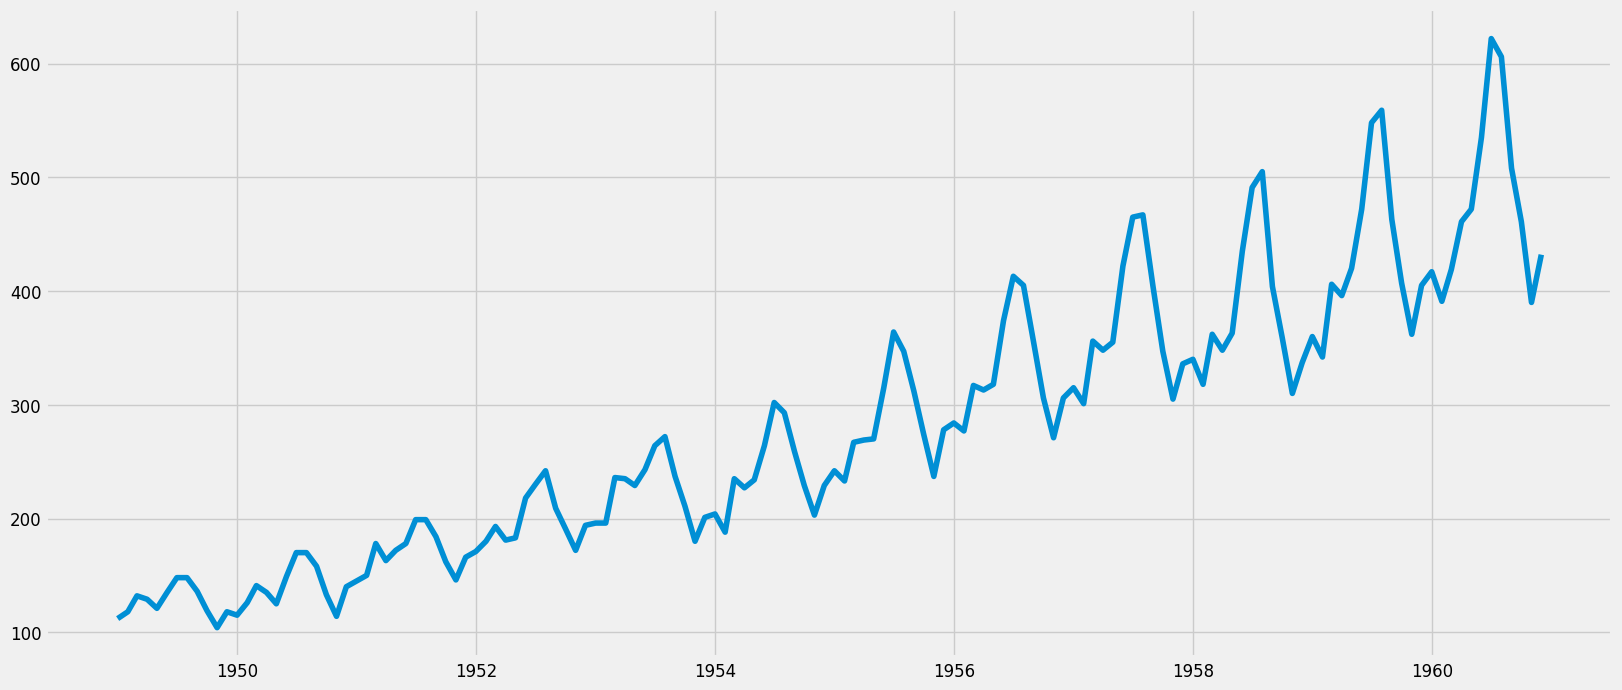

In [ ]:
plt.plot(y)
plt.show()

__Podemos verificar la estacionariedad utilizando lo siguiente:__

- __Gráficos ACF y PACF__: si la serie temporal es estacionaria, los gráficos ACF / PACF mostrarán una __disminución rápida de la correlación__ después de una pequeña cantidad de retraso entre los puntos.
- __Plotting Rolling Statistics__: podemos trazar el promedio móvil o la varianza móvil y ver si varía con el tiempo. La media móvil / varianza es para cualquier "t" instantánea, la media / varianza del último año, es decir, los últimos 12 meses.
- __Prueba de Dickey-Fuller aumentada:__ Esta es una de las pruebas estadísticas para verificar la estacionariedad. Aquí la hipótesis nula es que el TS no es estacionario. Los resultados de la prueba se componen de una estadística de prueba y algunos valores críticos para niveles de confianza diferentes. Si el "Estadístico de prueba" es menor que el "Valor crítico", podemos rechazar la hipótesis nula y decir que la serie es estacionaria. Consulte este artículo para más detalles.

### Gráficos ACF y PACF

- Repasemos los gráficos de la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF)
- Si la serie temporal es estacionaria, los gráficos ACF / PACF mostrarán una __disminución rápida de la correlación__ después de una pequeña cantidad de retraso entre los puntos.
- Estos datos no son estacionarios, ya que un gran número de observaciones anteriores están correlacionadas con valores futuros.
- Los intervalos de confianza se dibujan como un cono.
- De forma predeterminada, esto se establece en un intervalo de confianza del 95%, lo que sugiere que los valores de correlación fuera de este código son muy probablemente una correlación y no una casualidad estadística.
- La autocorrelación parcial en el retraso k es la correlación que resulta después de eliminar el efecto de cualquier correlación debido a los términos en los retrasos más cortos.

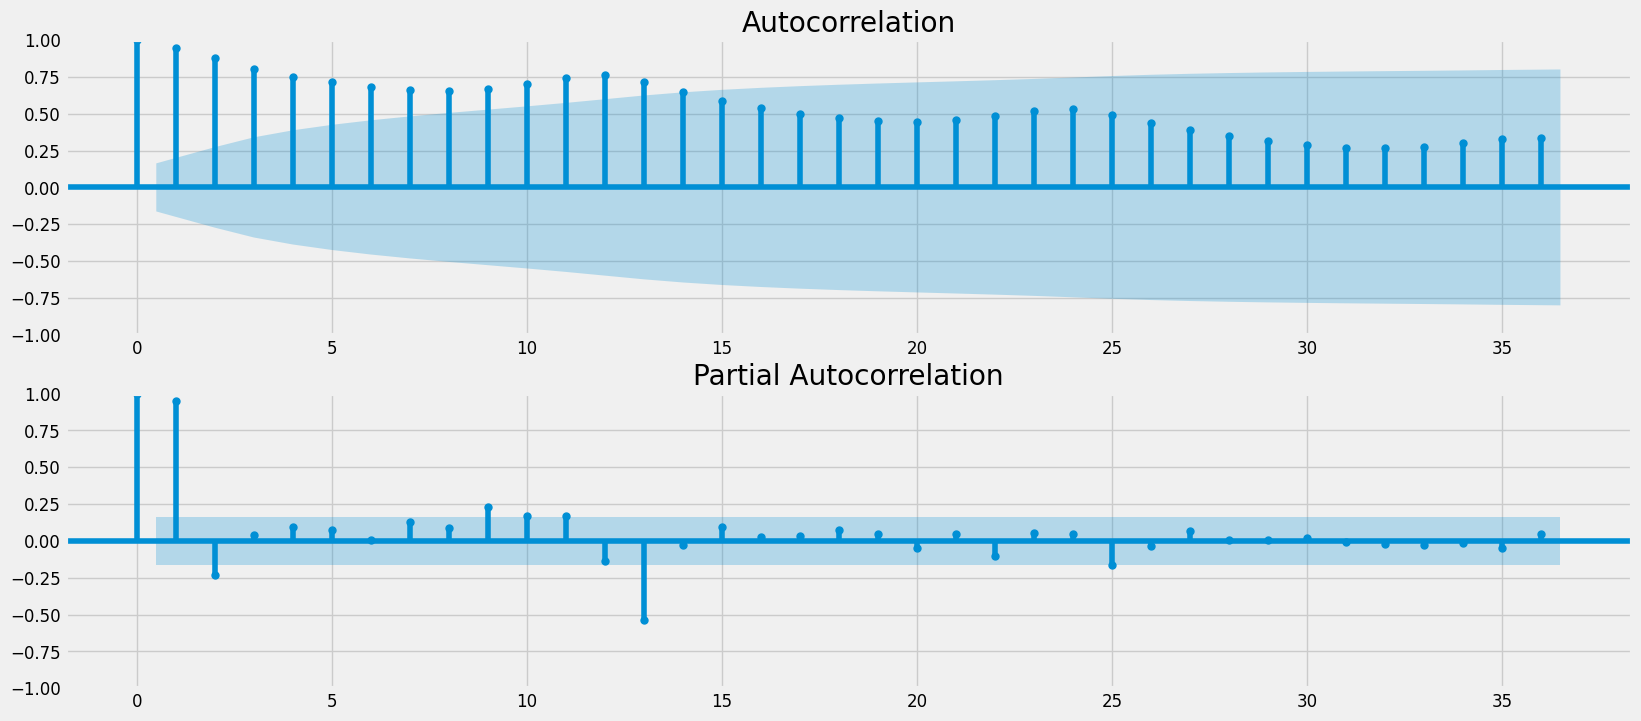

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.passengers, ax=pyplot.gca(), lags = 36)
pyplot.subplot(212)
plot_pacf(y.passengers, ax=pyplot.gca(), lags = 36)
pyplot.show()

### Graficando estadísticas continuas
- Observamos que la media móvil y la desviación estándar no son constantes con respecto al tiempo (tendencia creciente)
- Por lo tanto, la serie temporal no es estacionaria

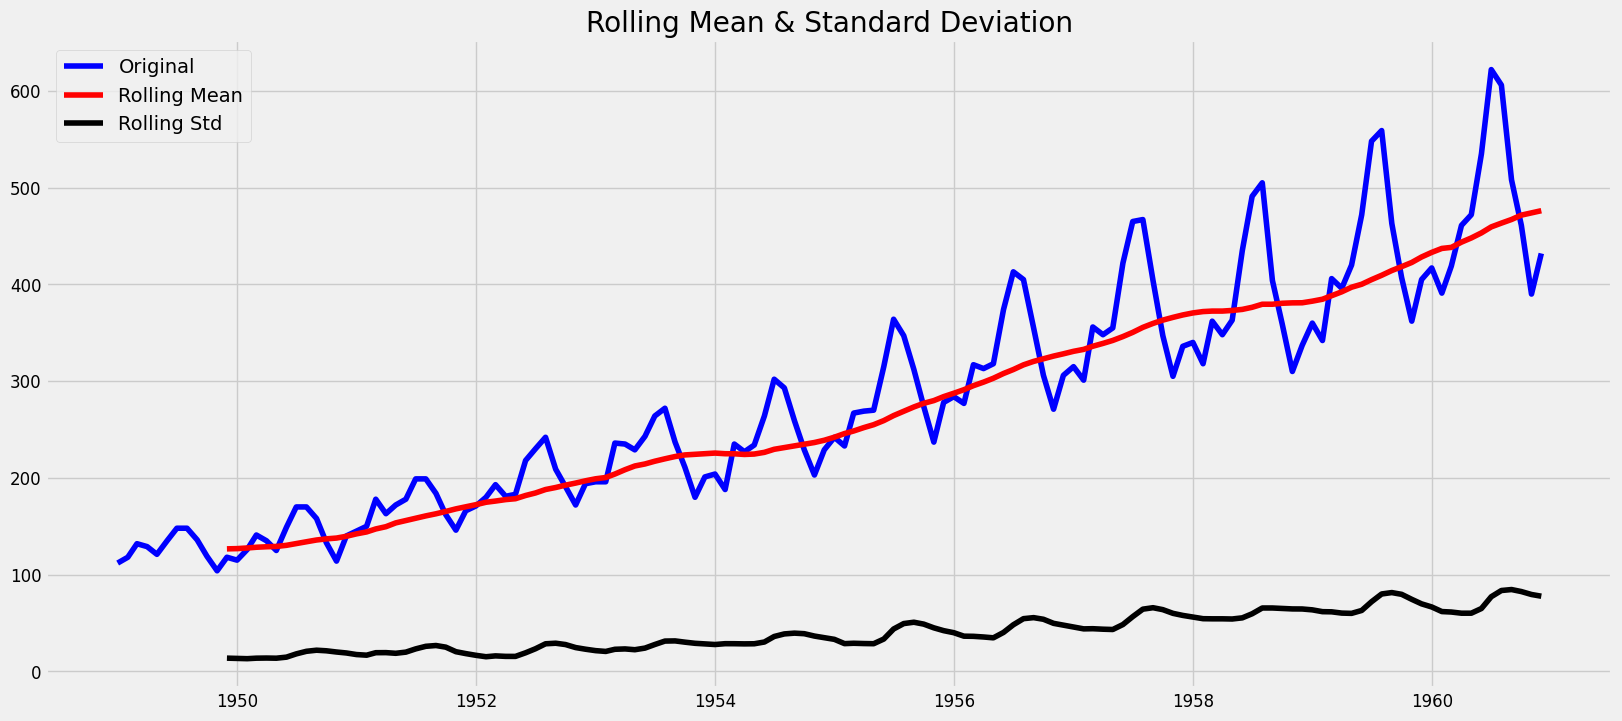

In [ ]:
#Determinar estadísticas continuas
rolmean = y.rolling(12).mean()
rolstd = y.rolling(12).std()

#Graficando estadísticas continuas
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


### Prueba de Dickey-Fuller aumentada
- La intuición detrás de la prueba es que si la serie está integrada, entonces el nivel rezagado de la serie y (t-1) no proporcionará información relevante para predecir el cambio en y (t).
- Hipótesis nula: la serie temporal no es estacionaria
- Rechazar la hipótesis nula (es decir, un valor p muy bajo) indicará estacionariedad

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.passengers, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Hacer series temporales estacionarias
Hay 2 razones principales detrás de la no estacionaria de un TS:

1. __Trend__ - media variable con el tiempo. Por ejemplo, en este caso vimos que, en promedio, el número de pasajeros crecía con el tiempo.
2. __Estacionalidad__ - variaciones en marcos de tiempo específicos. Por ejemplo, las personas pueden tener tendencia a comprar automóviles en un mes en particular debido a un incremento salarial o festivales.

### Transformaciones
- Podemos aplicar transformaciones que penalizan los valores más altos más que los valores más pequeños. Estos pueden tomar un registro, raíz cuadrada, raíz cúbica, etc. Tomemos una transformación de registro aquí por simplicidad:


#### Transformación logarítmica

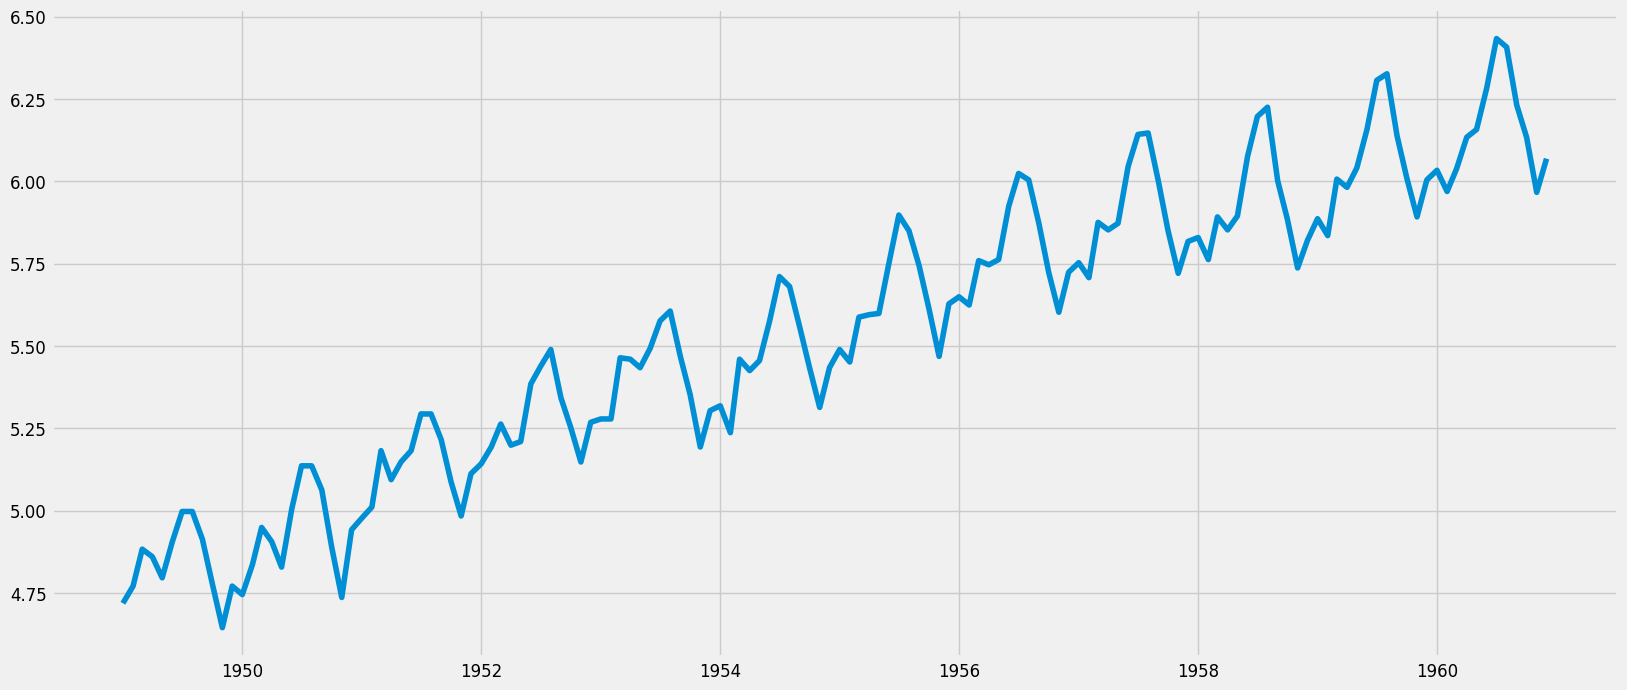

In [ ]:
ts_log = np.log(y)
plt.plot(ts_log)
plt.show()

#### Otras posibles transformaciones:
- Transformación exponencial
- Transformación de Box Cox
- Transformación de raíz cuadrada

**Diferenciación**

En esta técnica, tomamos la diferencia de la observación en un instante particular con la del instante anterior.
Diferenciación de primer orden en pandas


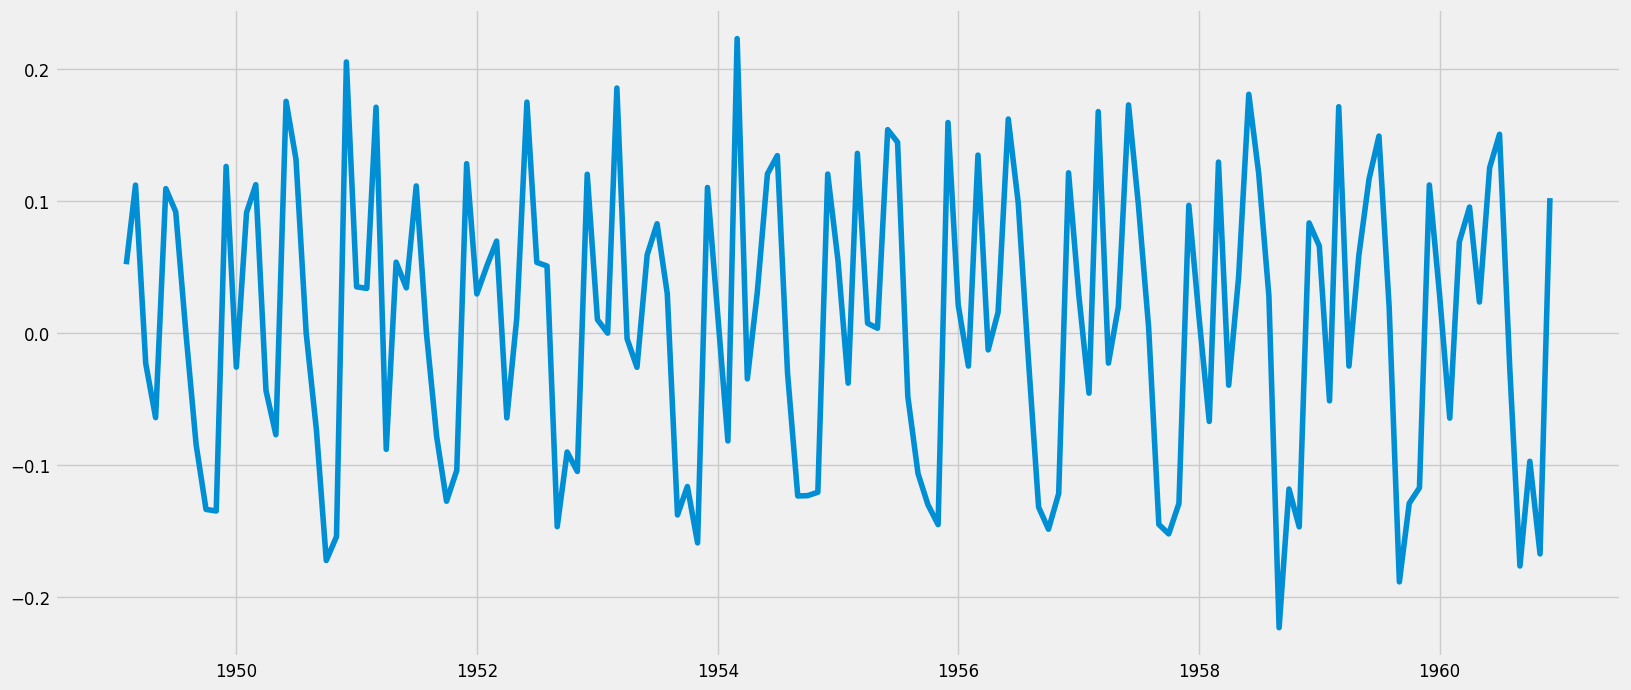

In [ ]:
ts_log_diff = ts_log.passengers - ts_log.passengers.shift()
plt.plot(ts_log_diff)
plt.show()

In [ ]:
ts_log_diff[1:]

year
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: passengers, Length: 143, dtype: float64

In [ ]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_log_diff[1:], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


**Descomposición**
- En este enfoque, tanto la tendencia como la estacionalidad se modelan por separado y se devuelve la parte restante de la serie.

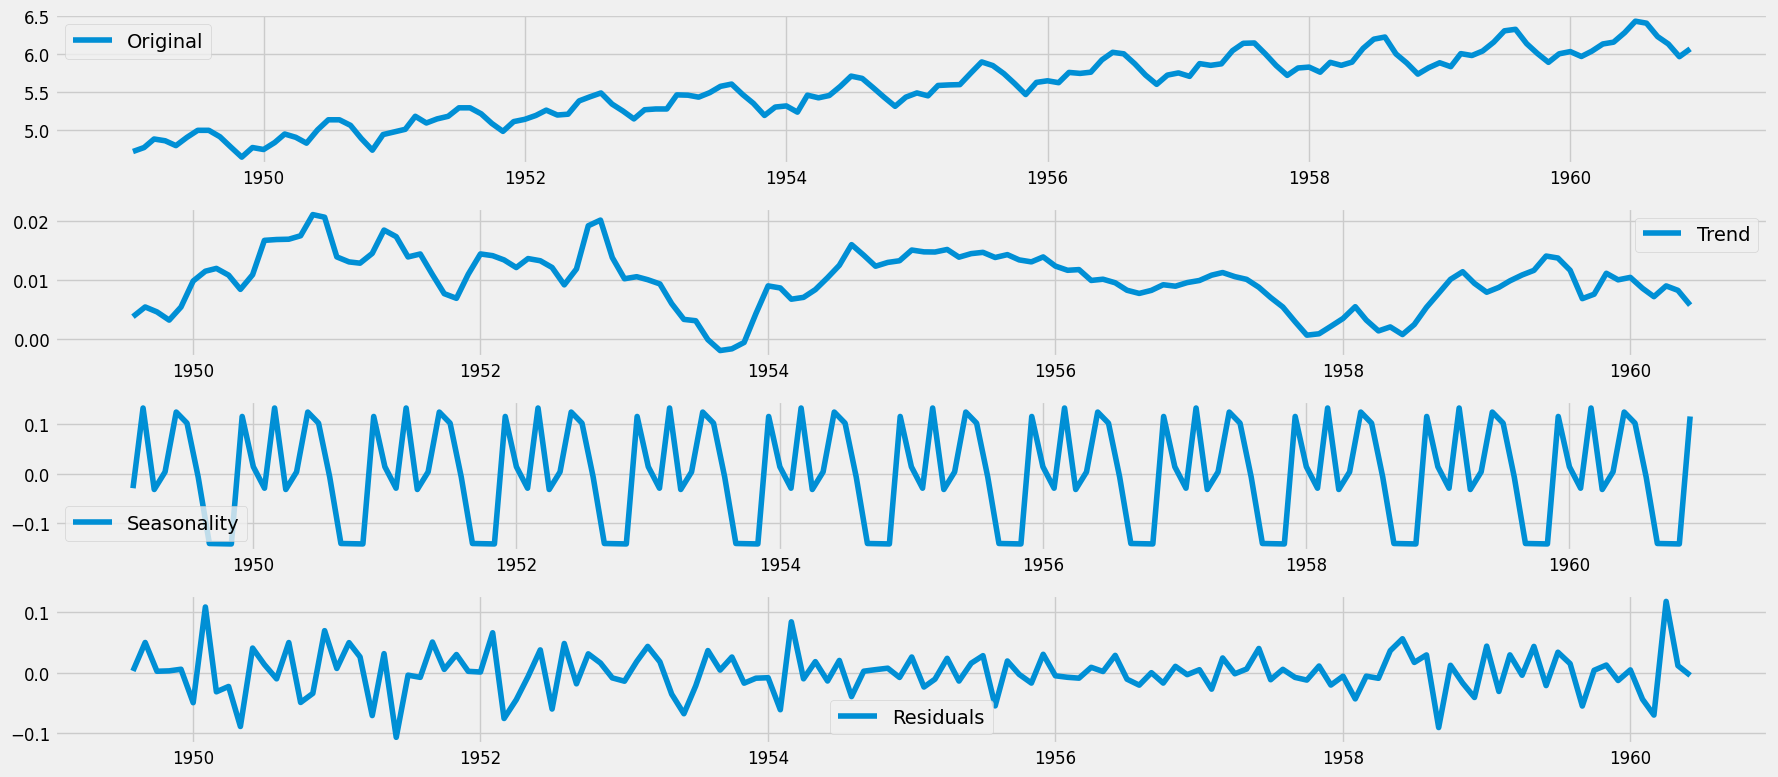

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_diff.dropna())

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()